This notebook explains how to calculate biases to galaxy clustering auto-spectra, using parallelization in NERSC 

In [118]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import biases

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Setup

Define the scenario we want to consider

In [119]:
sigma = 0.06 # Standard deviation of the fiducial dndz
z_mean = 0.59 # Central redshift of the fiducial dndz

# Set the range for the integrals over r. If this changes, the normalization of phi(r) will need to be changed too
z_min_int = 0.005
z_max_int = z_mean+2

# Now characterize the perturbations to the dndz
error_on_meanz = 0.017*(1+z_mean) # Error on RedMaGiC mean z, from arXiv:1708.01536
sigma_zshift = error_on_meanz # Standard deviation of the shifts in the central redshift of the distribution
sigma_zwidth = 0 #sigma/10. # Standard deviation of the variations in the width of the distribution
modulation_of_mean_of_draws = 0 # Consider also modulating the mean of these shifts across the sky

We also need to define the pixelization defining the perturbations of the dNdz

In [122]:
nside = 4

And the Lagrangian bias parameters for the galaxy power spectrum (if you want to use a different prescription, it's easy to modify the code to do so)

In [123]:
#UNIT-redmagic bias parameters from 2101.11014
#         b1,    b2,    bs2,   bnabla2, SN
bvec = [0.786, 0.583, -0.406, -0.512, 1755]

#### Preprocessing

First, a bit of pre-processing:

In [124]:
temp_exp.plo

Completed 0%
Completed 5%
Completed 11%
Completed 16%
Completed 22%
Completed 27%
Completed 32%
Completed 38%
Completed 43%
Completed 49%
Completed 54%
Completed 59%
Completed 65%
Completed 70%
Completed 76%
Completed 81%
Completed 86%
Completed 92%
Completed 97%


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


In [ ]:
for nside in np.array([8, 16, 32]):
    for sigma_zshift in np.array([2, 1, 0.5, 0.1])*error_on_meanz:
        temp_exp = biases.experiment(sigma, z_mean, sigma_zshift, sigma_zwidth, nside, bvec)
        filename = '/pscratch/sd/a/ab2368/data/redmagic_wn_sigmazshift{}_nside{}'.format(sigma_zshift, nside)
        # We save the key properties to file so they can be load by the parallel processes we're about to create
        temp_exp.save_properties(filename)

Note that you can already generate some interesting visualizations. For example:

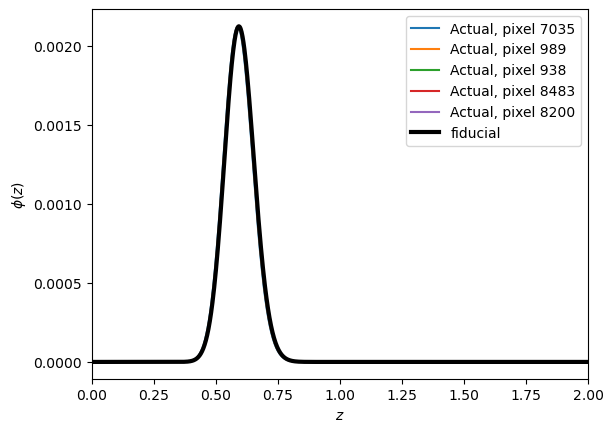

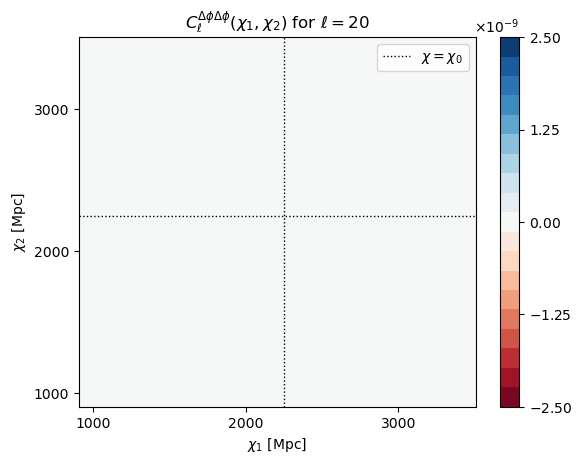

In [176]:
temp_exp.plot_realizations()
plt.show()
temp_exp.plot_ClDphi_vs_chi_chiprime_2D(20)

#### Scripts for parallelization

Let's write a script to compute the biases in parallel, using a different core/process for each $\ell$:

In [233]:
%%writefile /global/u1/a/ab2368/varying_dndzs/Varying_dndzs/scripts/compute_modecoupling_bias_in_parallel.py
#!/global/homes/a/ab2368/.conda/envs/varying_dndz python
import sys
sys.path.insert(0, '/global/homes/a/ab2368/varying_dndzs/Varying_dndzs/code/')
import numpy as np
import biases

# Load scenario from file
sigma_zshifts = np.array([2, 0.5, 0.1])*0.02703 #np.array([0.02703])
nsides = np.array([8, 16, 32])


# Hyperparameters for numerical integration
num_processes = 32
miniter = 1000
maxiter = 5000
tol = 1e-11

# The ells where we want to evaluate the spectra
ells = np.logspace(np.log10(50), 3, 16, dtype=int)

count = 0
for sigma_zshift in sigma_zshifts:
    for nside in nsides:
        filename = '/pscratch/sd/a/ab2368/data/redmagic_wn_sigmazshift{}_nside{}'.format(sigma_zshift, nside)
        loaded_exp = biases.load_from_file(filename)
        loaded_exp.ells = ells
        if count==0:
            # In all these cases, the unbiased PS is the same, so we only calculate it once
            unbiased_clgg = biases.unbiased_term(loaded_exp, loaded_exp.ells, num_processes=num_processes, miniter=miniter, maxiter=maxiter, tol=tol)
        loaded_exp.unbiased_clgg = unbiased_clgg
        loaded_exp.conv_bias = biases.mode_coupling_bias(loaded_exp, loaded_exp.ells,
                                                         num_processes=num_processes,
                                                         miniter=miniter, maxiter=maxiter, tol=tol)

        # Save to file, this time including the biases as an attribute!
        loaded_exp.save_properties(filename)
        print('done with {}'.format(filename))
        count += 1


In [167]:
%%writefile /global/u1/a/ab2368/varying_dndzs/Varying_dndzs/scripts/compute_additive_bias_in_parallel.py
#!/global/homes/a/ab2368/.conda/envs/varying_dndz python
import sys
sys.path.insert(0, '/global/homes/a/ab2368/varying_dndzs/Varying_dndzs/code/')
import numpy as np
import biases

# Load scenario from file
sigma_zshift = 0.02703
nside = 8
filename = '/pscratch/sd/a/ab2368/data/redmagic_wn_sigmazshift{}_nside'.format(sigma_zshift, nside)
loaded_exp = biases.load_from_file(filename)

# Hyperparameters for numerical integration
num_processes = 32
miniter = 1000
maxiter = 5000
tol = 1e-11

# The ells where we want to evaluate the spectra
loaded_exp.ells = np.logspace(0, np.log10(200), 16, dtype=int)

if hasattr(loaded_exp, 'additive_bias'):
    print("It looks like you've already computed the bias for this scenario. Please delete it from file you really want to re-rerun things.")
else:
    loaded_exp.additive_bias = biases.additive_bias(loaded_exp, loaded_exp.ells, num_processes=num_processes, miniter=miniter, maxiter=maxiter, tol=tol)
    #loaded_exp.unbiased_clgg = biases.unbiased_term(loaded_exp, loaded_exp.ells, num_processes=num_processes, miniter=miniter, maxiter=maxiter, tol=tol)

# Save to file, this time including the biases as an attribute!
loaded_exp.save_properties(filename)

Writing /global/u1/a/ab2368/varying_dndzs/Varying_dndzs/scripts/compute_additive_bias_in_parallel.py


This takes about 10 minutes on an interactive node on perlmutter

#### Inspecting the outputs

We can now simply plot the biases we've computed

Successfully loaded experiment object with properties:

Initialized empty object
Successfully loaded experiment object with properties:

Initialized empty object
Successfully loaded experiment object with properties:

Initialized empty object
Successfully loaded experiment object with properties:

Initialized empty object
Successfully loaded experiment object with properties:

Initialized empty object
Successfully loaded experiment object with properties:

Initialized empty object
Successfully loaded experiment object with properties:

Initialized empty object
Successfully loaded experiment object with properties:

Initialized empty object
Successfully loaded experiment object with properties:

Initialized empty object


Text(0, 0.5, '$C_\\ell$')

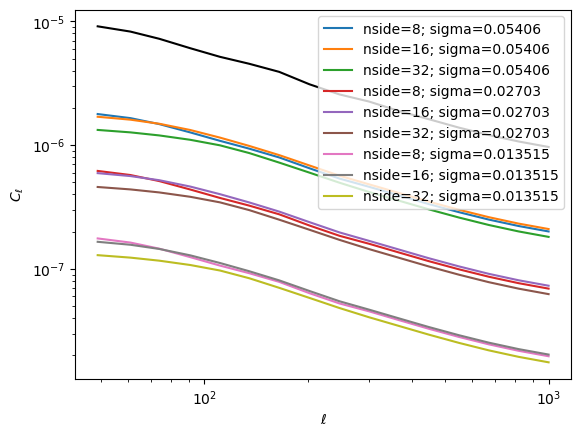

In [231]:
# Load scenario from file
for sigma_zshift in np.array([2, 1, 0.5])*error_on_meanz:
    for nside in np.array([8, 16, 32]):
        filename = '/pscratch/sd/a/ab2368/data/redmagic_wn_sigmazshift{}_nside{}'.format(sigma_zshift, nside)
        loaded_exp = biases.load_from_file(filename)
        plt.loglog(loaded_exp.ells, loaded_exp.conv_bias, label='nside={}; sigma={}'.format(nside, sigma_zshift))

plt.loglog(loaded_exp.ells, loaded_exp.unbiased_clgg, 'k')

plt.legend()
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell$')

Successfully loaded experiment object with properties:

Initialized empty object
Successfully loaded experiment object with properties:

Initialized empty object
Successfully loaded experiment object with properties:

Initialized empty object
Successfully loaded experiment object with properties:

Initialized empty object
Successfully loaded experiment object with properties:

Initialized empty object
Successfully loaded experiment object with properties:

Initialized empty object
Successfully loaded experiment object with properties:

Initialized empty object
Successfully loaded experiment object with properties:

Initialized empty object
Successfully loaded experiment object with properties:

Initialized empty object
Successfully loaded experiment object with properties:

Initialized empty object
Successfully loaded experiment object with properties:

Initialized empty object
Successfully loaded experiment object with properties:

Initialized empty object


Text(0.5, 1.0, 'These follow roughly the $\\sigma_{\\chi_0}^2$ dependence')

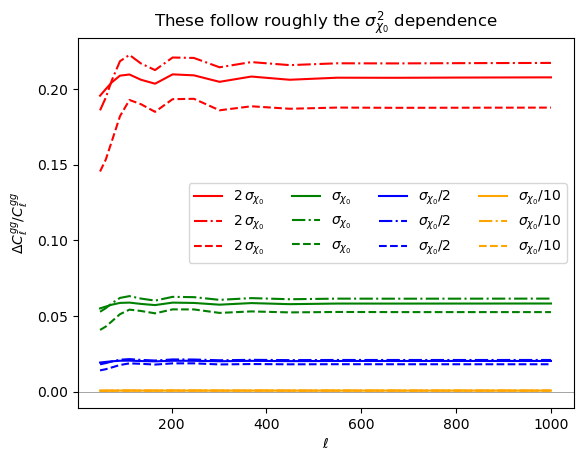

In [117]:
sigma_zshifts = np.array([2, 1, 0.5, 0.1])*error_on_meanz
sigma_zshift_labels = np.array([r'$2\,\sigma_{\chi_0}$', r'$\sigma_{\chi_0}$', r'$\sigma_{\chi_0}/2$', r'$\sigma_{\chi_0}/10$'])
sigma_zshift_colors = np.array(['r', 'g', 'b', 'orange'])
nsides = np.array([8, 16, 32])

for sigma_zshift, color, labels in zip(sigma_zshifts, sigma_zshift_colors, sigma_zshift_labels):
    for nside, ls in zip(nsides, np.array(['-', '-.', '--'])):
        filename = '/pscratch/sd/a/ab2368/data/redmagic_wn_sigmazshift{}_nside{}'.format(sigma_zshift, nside)
        loaded_exp = biases.load_from_file(filename)
        plt.plot(loaded_exp.ells, loaded_exp.conv_bias/loaded_exp.unbiased_clgg,
                 color=color, ls=ls, label=r'{}'.format(labels))

plt.legend(ncol=len(sigma_zshifts))
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\Delta C^{gg}_\ell/ C^{gg}_\ell$')
plt.axhline(0, lw=0.5, color='gray')
#plt.xlim([np.min(loaded_exp.ells), np.max(loaded_exp.ells)])
plt.title(r'These follow roughly the $\sigma_{\chi_0}^2$ dependence')

Note: same scatter despite different realizations. same scatter for same nside.

still dont understand: 1) why we dont get a monotonic increase with niside 2) the dropoff at low l (but it's possible it's physical)

Could it be that the slope of Pgg drops below l=100, so the mode-coupling is less significant?

# Understanding behaviour with nside

In [94]:
from scipy.ndimage.filters import gaussian_filter
import utils

def plot_ClDphi_of_chi_2D(exp):
    '''
    Plot log C_l^{\Delta \phi}(\chi,\chi) against l and  \mathrm{log}_{10}\,\chi
    '''
    X, Y = np.meshgrid(np.arange(len(exp.chi_array)), np.arange(exp.lmax + 1))
    Z = np.log10(np.diagonal(exp.Cl_deltap_of_chi1_chi2, axis1=1, axis2=2))
    # Set the log of 0 to a tiny negative number
    Z[np.diagonal(exp.Cl_deltap_of_chi1_chi2, axis1=1, axis2=2) == 0] = -1e100

    contours = np.linspace(-20, -9, 20)

    # Smooth array with a Gaussian filter for plotting purposes
    Z_smoothed = gaussian_filter(Z, sigma=3)
    plt.contourf(X, Y, Z_smoothed, levels=contours, cmap='inferno', extend='both')

    ax = plt.gca()
    ax.axvline(np.where(exp.chi_array > exp.chi_mean_fid)[0][0], color='r', ls='--', lw=1,
               label=r'$r=\chi(z_{\mathrm{mean}})$')
    ax.set_ylim([0, exp.lmax])

    plt.xlabel(r'$\mathrm{log}_{10}\,\chi$')
    plt.ylabel(r'$l$')

    label_locs = np.arange(1000, 7000, 1000, dtype=int)
    ax.set_xticks(utils.find_closest_indices(exp.chi_array, label_locs))
    ax.set_xticklabels(label_locs.astype('str'))
    plt.legend()

    plt.title(r'$\mathrm{log}_{10} \, C_l^{\Delta \phi}(\chi)$')
    plt.colorbar(location='right')
    plt.show()
    
def plot_ClDphi_of_chi(exp, ls='-'):
    '''
    Plot C_l^{\Delta \phi}(\chi,\chi) vs \mathrm{log}_{10}\,\chi for various l's
    '''
    for l_to_plot in np.linspace(10, 150, 4, dtype=int):
        plt.plot(exp.chi_array, np.diagonal(exp.Cl_deltap_of_chi1_chi2, axis1=1, axis2=2)[l_to_plot, :],
                 label=r'$l={}$'.format(l_to_plot), ls=ls)
    plt.axvline(exp.chi_mean_fid, ls='--', color='k', label=r'$r=\chi(z_{\mathrm{mean}})$')
    plt.xlabel(r'$\mathrm{log}_{10}\,\chi$')
    plt.ylabel(r'$C_l^{\Delta \phi}(\chi,\chi)$')
    plt.legend()
    plt.ylim([0,9e-10])
    plt.xlim([1, 5000])
    # for Matplotlib version >= 1.5
    plt.gca().set_prop_cycle(None)

In [80]:
import healpy as hp
pixwinf_128 = hp.pixwin(128)
pixwinf_64 = hp.pixwin(64)

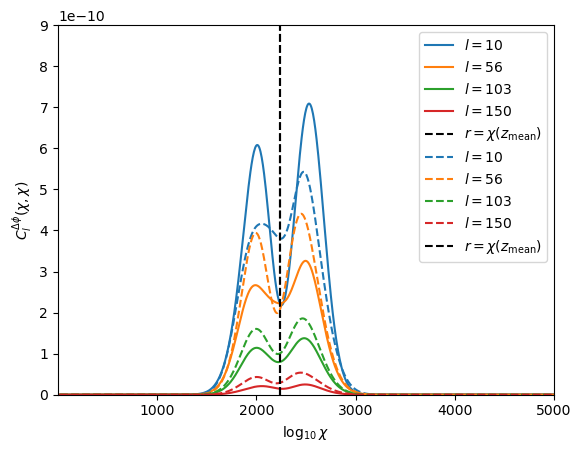

In [97]:
plot_ClDphi_of_chi(test_A)
plot_ClDphi_of_chi(test_B, ls='--')
plt.show()

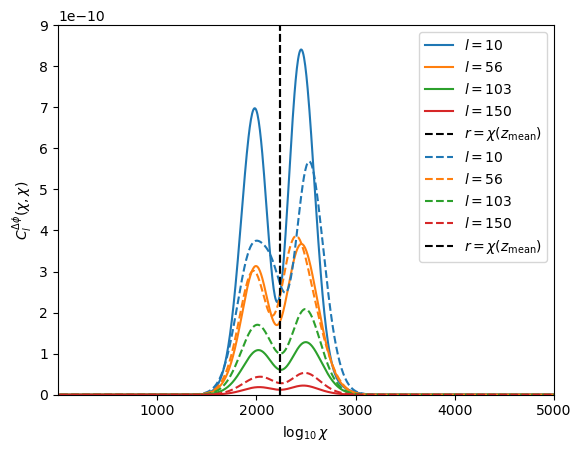

In [96]:
test_A = biases.experiment(sigma, z_mean, sigma_zshift, sigma_zwidth, nside, bvec, nside_upsampling=128)
test_B = biases.experiment(sigma, z_mean, sigma_zshift, sigma_zwidth, nside, bvec, nside_upsampling=64)


Completed 0%
Completed 1%
Completed 3%
Completed 4%
Completed 5%
Completed 7%
Completed 8%
Completed 9%
Completed 11%
Completed 12%
Completed 14%
Completed 15%
Completed 16%
Completed 18%
Completed 19%
Completed 20%
Completed 22%
Completed 23%
Completed 24%
Completed 26%
Completed 27%
Completed 28%
Completed 30%
Completed 31%
Completed 32%
Completed 34%
Completed 35%
Completed 37%
Completed 38%
Completed 39%
Completed 41%
Completed 42%
Completed 43%
Completed 45%
Completed 46%
Completed 47%
Completed 49%
Completed 50%
Completed 51%
Completed 53%
Completed 54%
Completed 55%
Completed 57%
Completed 58%
Completed 60%
Completed 61%
Completed 62%
Completed 64%
Completed 65%
Completed 66%
Completed 68%
Completed 69%
Completed 70%
Completed 72%
Completed 73%
Completed 74%
Completed 76%
Completed 77%
Completed 78%
Completed 80%
Completed 81%
Completed 83%
Completed 84%
Completed 85%
Completed 87%
Completed 88%
Completed 89%
Completed 91%
Completed 92%
Completed 93%
Completed 95%
Completed 96%


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


Completed 0%
Completed 5%
Completed 11%
Completed 16%
Completed 22%
Completed 27%
Completed 32%
Completed 38%
Completed 43%
Completed 49%
Completed 54%
Completed 59%
Completed 65%
Completed 70%
Completed 76%
Completed 81%
Completed 86%
Completed 92%
Completed 97%


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 64, in __init__
    self.fft_object = pyfftw.FFTW(self.fs, self.fks, direction='FFTW_FORWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/global/homes/a/ab2368/.conda/envs/varying_dndz/lib/python3.9/site-packages/velocileptors/Utils/spherical_bessel_transform_fftw.py", line 65, in __init__
    self.ifft_object = pyfftw.FFTW(self.gks, self.gs, direction='FFTW_BACKWARD',threads=threads)
RuntimeError: Undefined plan with nthreads. This is a bug


Successfully loaded experiment object with properties:

Initialized empty object


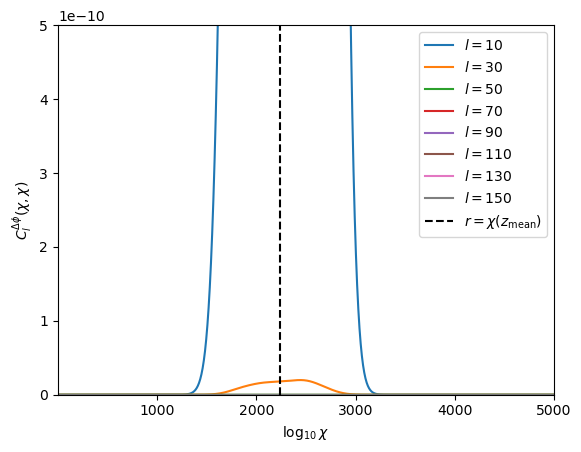

Successfully loaded experiment object with properties:

Initialized empty object


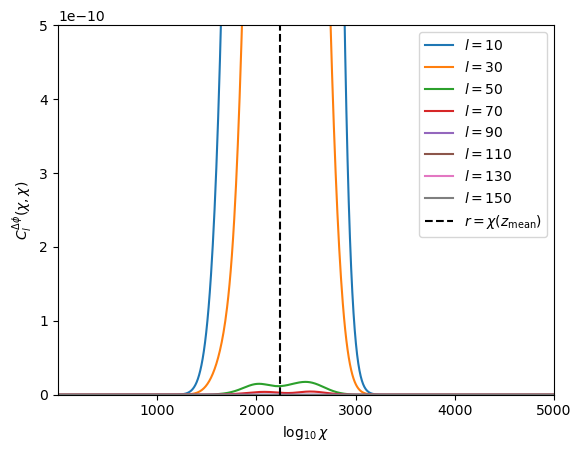

Successfully loaded experiment object with properties:

Initialized empty object


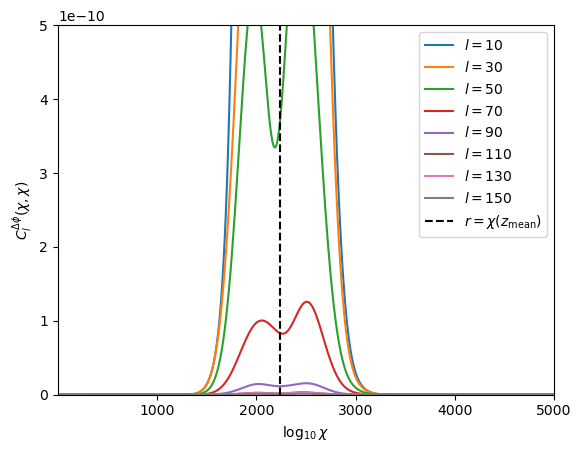

Successfully loaded experiment object with properties:

Initialized empty object


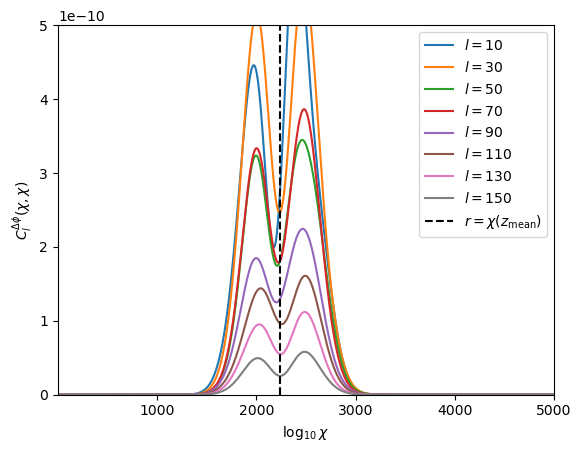

In [52]:
for nside in np.array([4, 8, 16, 32]):
    for sigma_zshift in np.array([2])*error_on_meanz:
        filename = '/pscratch/sd/a/ab2368/data/redmagic_wn_sigmazshift{}_nside{}'.format(sigma_zshift, nside)
        temp_exp = biases.load_from_file(filename)
        plot_ClDphi_of_chi(temp_exp)
        plt.show()

Successfully loaded experiment object with properties:

Initialized empty object


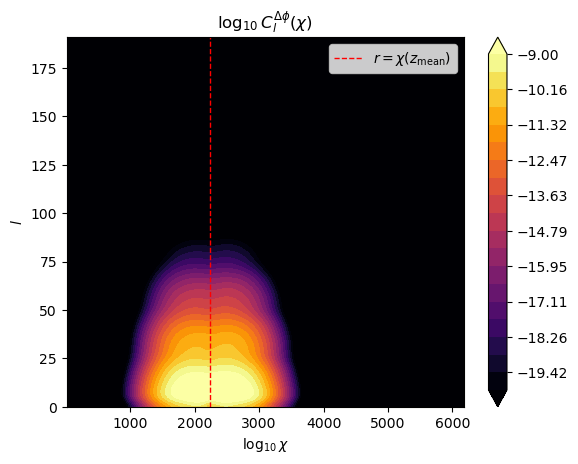

Successfully loaded experiment object with properties:

Initialized empty object


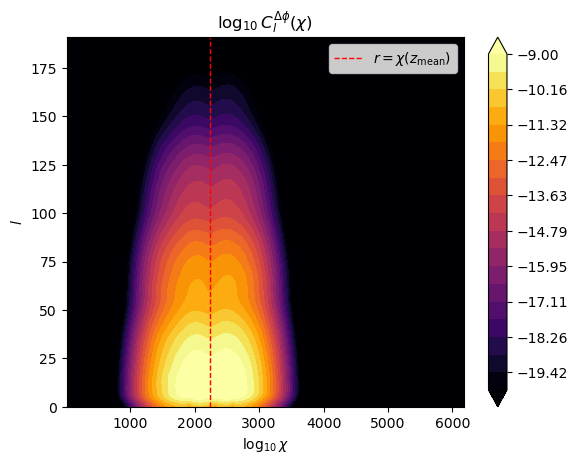

Successfully loaded experiment object with properties:

Initialized empty object


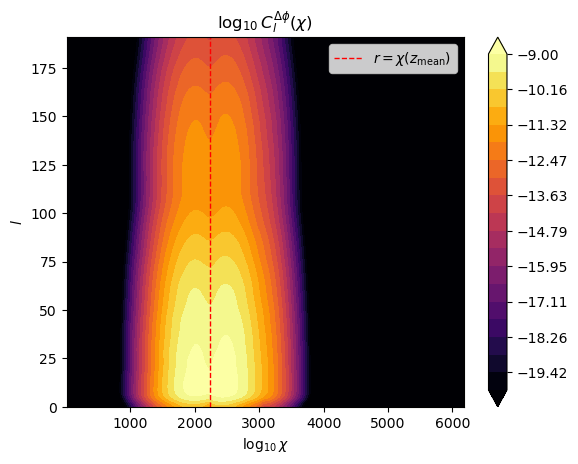

Successfully loaded experiment object with properties:

Initialized empty object


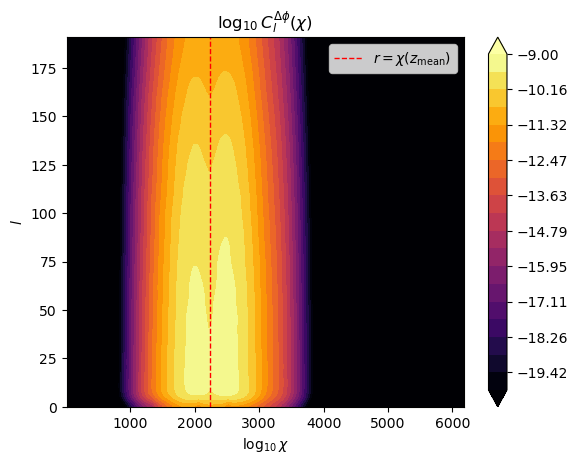

In [20]:
for nside in np.array([4, 8, 16, 32]):
    for sigma_zshift in np.array([2])*error_on_meanz:
        filename = '/pscratch/sd/a/ab2368/data/redmagic_wn_sigmazshift{}_nside{}'.format(sigma_zshift, nside)
        temp_exp = biases.load_from_file(filename)
        plot_ClDphi_of_chi_2D(temp_exp)
        plt.show()